# Flight Delay vs Precipitation
*Natalie*

In [118]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv( '../data/clean_2018_3_days.csv')


In [119]:

df.head()

,Flight_Date,Origin_Airport,Destination_Airport,Flight_Number,Operating_Carrier,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay,Scheduled_Departure_Time,Actual_Departure_Time,...,Destination Cloud Cover,Destination Dew,Destination Humidity,Destination Precipitation,Destination Pressure,Destination Snow,Destination Temperature,Destination Visibility,Destination Windspeed,Destination Precipitation Probability
0,2018-07-20,ABQ,AUS,5929,WN,1900,1917.0,17.0,1625,1644.0,...,7.8,68.6,51.96,0.0,1013.0,0.0,88.5,9.9,6.7,0.0
1,2018-07-20,ABQ,BWI,2377,WN,2155,2222.0,27.0,1615,1624.0,...,67.1,57.3,39.19,0.0,1017.9,0.0,84.9,9.9,5.8,0.0
2,2018-07-20,ABQ,BWI,2504,WN,1410,1441.0,31.0,825,834.0,...,53.4,66.9,78.19,0.0,1020.0,0.0,74.1,9.9,0.7,0.0
3,2018-07-20,ABQ,DAL,15,WN,905,850.0,-15.0,620,618.0,...,28.8,59.6,31.21,0.0,1010.9,0.0,94.7,9.9,13.1,0.0
4,2018-07-20,ABQ,DAL,942,WN,1620,1622.0,2.0,1340,1339.0,...,28.8,59.6,31.21,0.0,1010.9,0.0,94.7,9.9,13.1,0.0


The correlation between both factors is 0.06


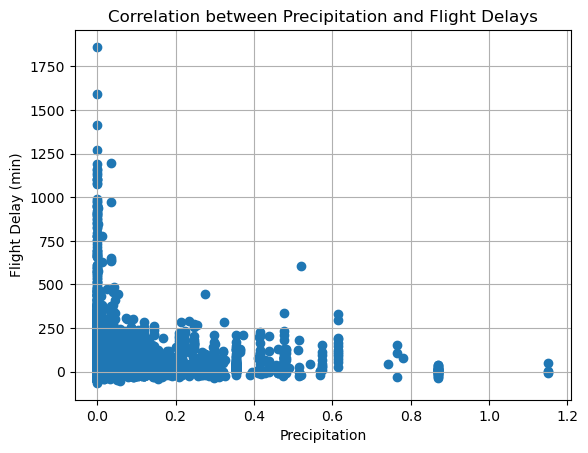

In [120]:
#Correlation Precipitation vs Flight Delay

x_values = df['Origin Precipitation']
y_values = df["Arrival_Delay"]

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Plot the scatter
plt.scatter(x_values,y_values)
plt.xlabel('Precipitation')
plt.ylabel('Flight Delay (min)')
plt.title('Correlation between Precipitation and Flight Delays')
plt.grid(True)

The r-squared is: 0.0041917182576664295


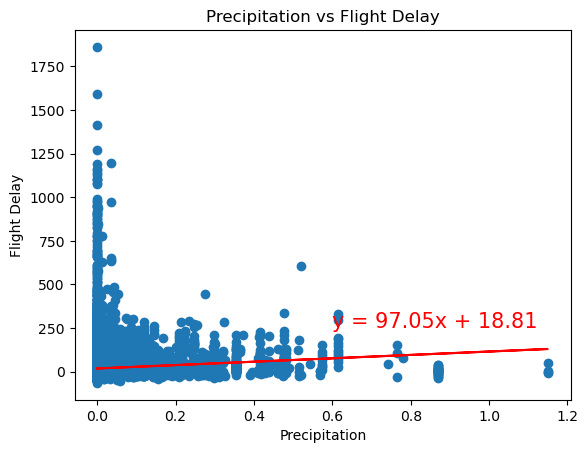

In [121]:
# Plot the linear regression model on top of scatter plot
x_values = df['Origin Precipitation']
y_values = df["Arrival_Delay"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.6,250),fontsize=15,color="red")
plt.xlabel('Precipitation')
plt.ylabel('Flight Delay')
plt.title('Precipitation vs Flight Delay')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The correlation between both factors is 0.05


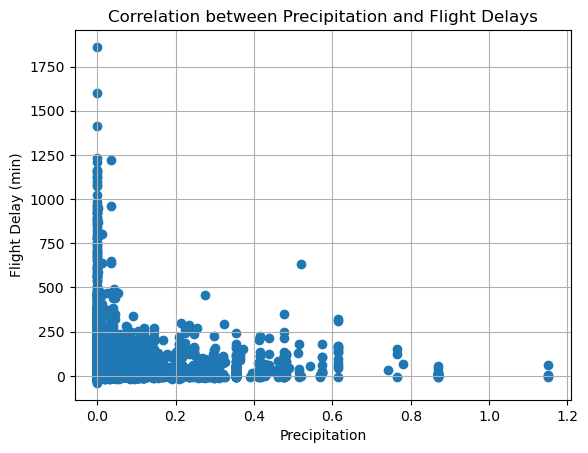

In [122]:
x_values = df['Origin Precipitation']
y_values = df["Departure_Delay"]

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Plot the scatter
plt.scatter(x_values,y_values)
plt.xlabel('Precipitation')
plt.ylabel('Flight Delay (min)')
plt.title('Correlation between Precipitation and Flight Delays')
plt.grid(True)

The r-squared is: 0.002558448130958144


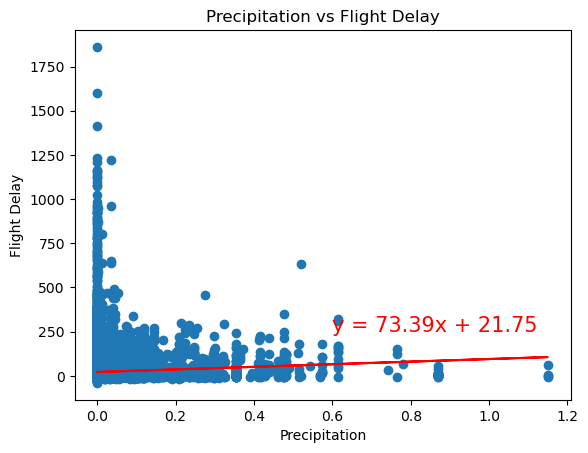

In [123]:
# Plot the linear regression model on top of scatter plot
x_values = df['Origin Precipitation']
y_values = df["Departure_Delay"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.6,250),fontsize=15,color="red")
plt.xlabel('Precipitation')
plt.ylabel('Flight Delay')
plt.title('Precipitation vs Flight Delay')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [159]:
def stats_summary(list_of_series):

    mean, median, mode, norm_test, std_dev, lq, uq, inter_q, l_thres, u_thres = [[] for _ in range(10)]


    for df in list_of_series:
        mean.append(np.mean(df))
        mode.append(st.mode(df, keepdims=False))
        norm_test.append(st.normaltest(df))
        std_dev.append(np.std(df))
        lq_, median_, uq_ = df.quantile([.25, .5, .75])
        lq.append(lq_)
        uq.append(uq_)
        median.append(median_)
        inter_q.append(uq_ - lq_)
        lThres_, uThres_ = st.mstats.mquantiles(df, [0.25, 0.75])
        l_thres.append(lThres_)
        u_thres.append(uThres_)

    mode_ = []
    for i in mode:
        mode_.append(i[0])
    p_val = []
    statistics = []
    for i in norm_test:
        p_val.append(i[1])
        statistics.append(i[0])

    stats_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Mode': mode_,
        'P Value': p_val,
        'Statistics': statistics,
        'Standard Deviation': std_dev,
        'Lower Quartile': lq,
        'Upper Quartile': uq,
        'Interquartile Range': inter_q,
        'Lower Threshold': l_thres,
        'Upper Threshold': u_thres,
    }, index=['Arrival_Delay', 'Departure_Delay', 'Precipitation'])

    return stats_df

In [161]:
stats_sum_dep = stats_summary([df['Origin Precipitation'], df['Arrival_Delay'],df['Departure_Delay']])
stats_sum_dep


,Mean,Median,Mode,P Value,Statistics,Standard Deviation,Lower Quartile,Upper Quartile,Interquartile Range,Lower Threshold,Upper Threshold
Arrival_Delay,0.006057,0.0,0.0,0.0,109814.529211,0.039318,0.0,0.0,0.0,0.0,0.0
Departure_Delay,19.397872,0.0,-9.0,0.0,75059.122949,58.936434,-10.0,26.0,36.0,-10.0,26.0
Precipitation,22.199424,0.0,-3.0,0.0,79266.613100,57.048954,-4.0,25.0,29.0,-4.0,25.0


In [170]:

df_filtered = df[df['Destination_Airport'].notna()]

# Group the filtered data by 'Origin_Airport' and 'Destination_Airport' and calculate the total precipitation for each combination of airports
airport_precipitation = df_filtered.groupby(['Origin_Airport', 'Destination_Airport'])['Origin Precipitation'].sum()

print(airport_precipitation)


Origin_Airport  Destination_Airport
ABE             ATL                    0.308
                CLT                    0.078
                DTW                    0.097
                FLL                    0.004
                MYR                    0.000
                                       ...  
XNA             SFB                    0.000
                SFO                    0.000
YAK             CDV                    0.000
                JNU                    0.000
YUM             PHX                    0.000
Name: Origin Precipitation, Length: 5182, dtype: float64


In [182]:
airport_precipitation = df.groupby(['Origin_Airport', 'Destination_Airport'])['Origin Precipitation'].sum()

# Sort the airports based on total precipitation in descending order
sorted_airports = airport_precipitation.sort_values(ascending=False)

# Select the top 10 airports with the highest precipitation
top_10_airports = sorted_airports.head(10)

print(top_10_airports)


Origin_Airport  Destination_Airport
BWI             ATL                    3.723
ITO             HNL                    3.132
MIA             ATL                    2.455
COS             DEN                    2.392
BWI             CLT                    2.354
MYR             CLT                    2.248
                ATL                    2.229
ILM             CLT                    2.200
MIA             ORD                    2.147
BWI             CVG                    1.949
Name: Origin Precipitation, dtype: float64


In [186]:
# Find the airport with the highest precipitation
max_precipitation_airport = df.loc[df['Origin Precipitation'].idxmax(), 'Origin_Airport']
max_precipitation_value = df['Origin Precipitation'].max()

print(f"The airport with the highest precipitation is {max_precipitation_airport} with a value of {max_precipitation_value}.")

# Find the airport with the lowest precipitation
min_precipitation_airport = df.loc[df['Origin Precipitation'].idxmin(), 'Origin_Airport']
min_precipitation_value = df['Origin Precipitation'].min()

print(f"The airport with the lowest precipitation is {min_precipitation_airport} with a value of {min_precipitation_value}.")


The airport with the highest precipitation is MYR with a value of 1.151.
The airport with the lowest precipitation is ABQ with a value of 0.0.


In [187]:
# Find the airport with the highest precipitation
max_precipitation_airport = df.loc[df['Origin Precipitation'].idxmax(), 'Destination_Airport']
max_precipitation_value = df['Origin Precipitation'].max()

print(f"The airport with the highest precipitation is {max_precipitation_airport} with a value of {max_precipitation_value}.")

# Find the airport with the lowest precipitation
min_precipitation_airport = df.loc[df['Origin Precipitation'].idxmin(), 'Destination_Airport']
min_precipitation_value = df['Origin Precipitation'].min()

print(f"The airport with the lowest precipitation is {min_precipitation_airport} with a value of {min_precipitation_value}.")


The airport with the highest precipitation is ATL with a value of 1.151.
The airport with the lowest precipitation is AUS with a value of 0.0.


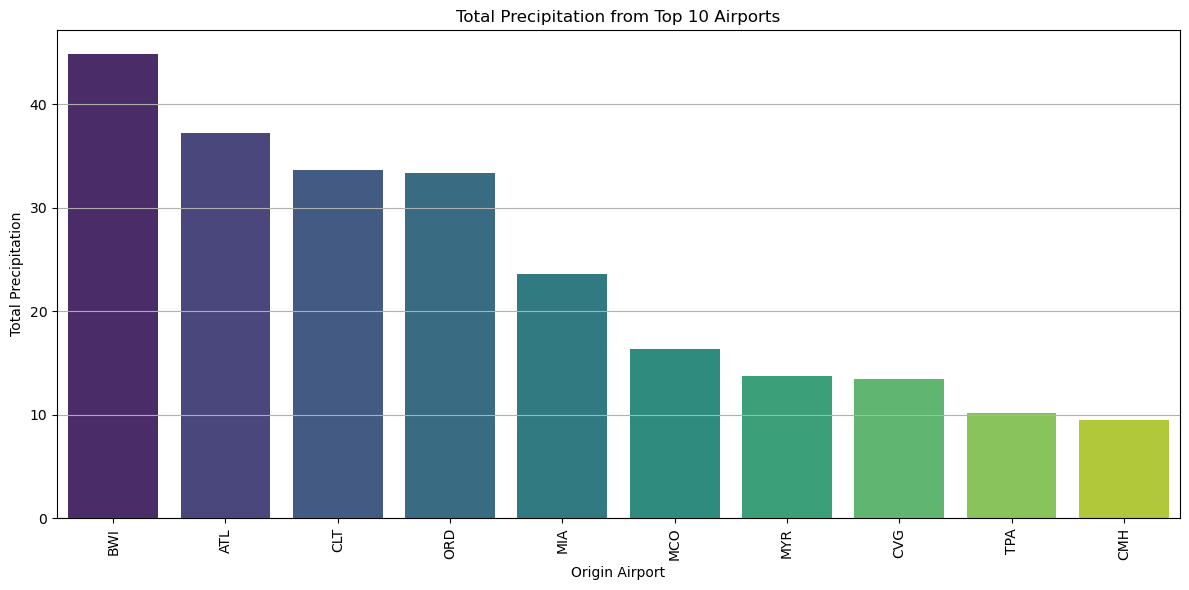

In [185]:

airport_precipitation_total = df.groupby('Origin_Airport')['Origin Precipitation'].sum()

# Sort the airports based on the total precipitation in descending order
sorted_airports_by_precipitation = airport_precipitation_total.sort_values(ascending=False)

# Select the top 10 airports with the highest precipitation
top_10_airports_by_precipitation = sorted_airports_by_precipitation.head(10)

# Filter the DataFrame to include data only for the top 10 airports with the highest precipitation
df_top_10_airports_by_precipitation = df[df['Origin_Airport'].isin(top_10_airports_by_precipitation.index)]

# Plot the bar plot for the top 10 airports with the highest precipitation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_airports_by_precipitation.index, y=top_10_airports_by_precipitation.values, palette='viridis')
plt.xlabel('Origin Airport')
plt.ylabel('Total Precipitation')
plt.title('Total Precipitation from Top 10 Airports')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


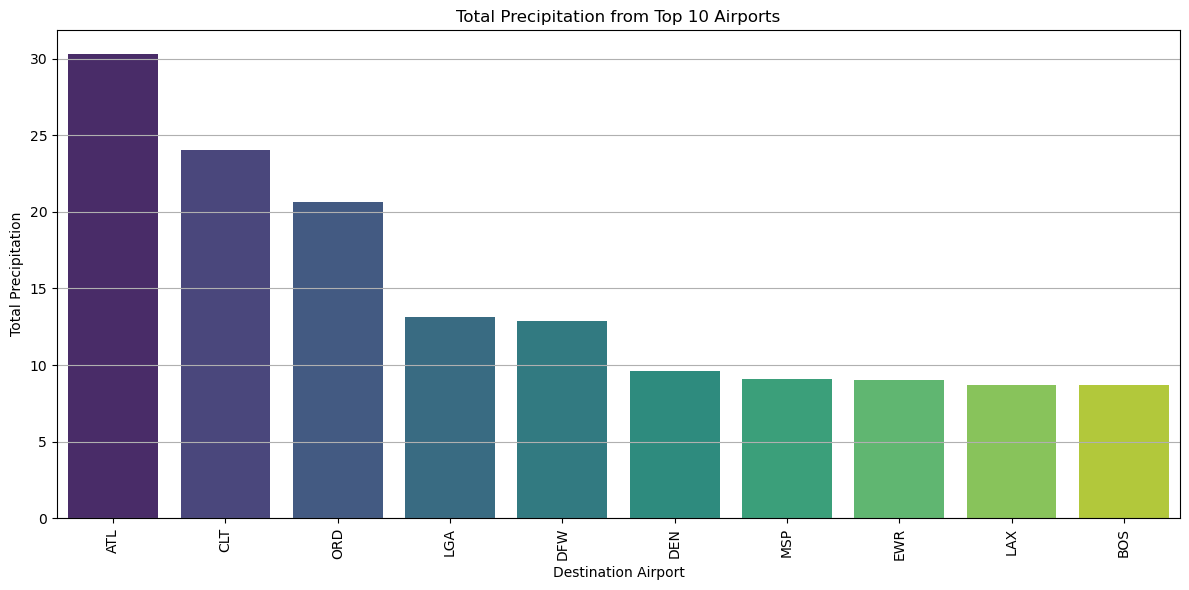

In [188]:
airport_precipitation_total = df.groupby('Destination_Airport')['Origin Precipitation'].sum()

# Sort the airports based on the total precipitation in descending order
sorted_airports_by_precipitation = airport_precipitation_total.sort_values(ascending=False)

# Select the top 10 airports with the highest precipitation
top_10_airports_by_precipitation = sorted_airports_by_precipitation.head(10)

# Filter the DataFrame to include data only for the top 10 airports with the highest precipitation
df_top_10_airports_by_precipitation = df[df['Destination_Airport'].isin(top_10_airports_by_precipitation.index)]

# Plot the bar plot for the top 10 airports with the highest precipitation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_airports_by_precipitation.index, y=top_10_airports_by_precipitation.values, palette='viridis')
plt.xlabel('Destination Airport')
plt.ylabel('Total Precipitation')
plt.title('Total Precipitation from Top 10 Airports')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [191]:

airport_precipitation_total = df.groupby('Origin_Airport')['Origin Precipitation'].sum()

# Sort the airports based on the total precipitation in descending order to get top 10 airports with highest precipitation
top_10_highest_precipitation_airports = airport_precipitation_total.sort_values(ascending=False).head(10)

# Sort the airports based on the total precipitation in ascending order to get top 10 airports with lowest precipitation
top_10_lowest_precipitation_airports = airport_precipitation_total.sort_values().head(10)

# Calculate summary statistics for the top 10 airports with highest precipitation
summary_stats_highest_precipitation = top_10_highest_precipitation_airports.describe()

# Calculate summary statistics for the top 10 airports with lowest precipitation
summary_stats_lowest_precipitation = top_10_lowest_precipitation_airports.describe()

# Print the summary statistics
print("Summary Statistics for Top 10 Airports with Highest Precipitation:")
print(summary_stats_highest_precipitation)

print("\nSummary Statistics for Top 10 Airports with Lowest Precipitation:")
print(summary_stats_lowest_precipitation)


Summary Statistics for Top 10 Airports with Highest Precipitation:
count    10.000000
mean     23.591800
std      12.761726
min       9.484000
25%      13.546500
50%      19.975000
75%      33.570000
max      44.901000
Name: Origin Precipitation, dtype: float64

Summary Statistics for Top 10 Airports with Lowest Precipitation:
count    10.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Origin Precipitation, dtype: float64


In [192]:
airport_precipitation_total = df.groupby('Destination_Airport')['Origin Precipitation'].sum()

# Sort the airports based on the total precipitation in descending order to get top 10 airports with highest precipitation
top_10_highest_precipitation_airports = airport_precipitation_total.sort_values(ascending=False).head(10)

# Sort the airports based on the total precipitation in ascending order to get top 10 airports with lowest precipitation
top_10_lowest_precipitation_airports = airport_precipitation_total.sort_values().head(10)

# Calculate summary statistics for the top 10 airports with highest precipitation
summary_stats_highest_precipitation = top_10_highest_precipitation_airports.describe()

# Calculate summary statistics for the top 10 airports with lowest precipitation
summary_stats_lowest_precipitation = top_10_lowest_precipitation_airports.describe()

# Print the summary statistics
print("Summary Statistics for Top 10 Airports with Highest Precipitation:")
print(summary_stats_highest_precipitation)

print("\nSummary Statistics for Top 10 Airports with Lowest Precipitation:")
print(summary_stats_lowest_precipitation)

Summary Statistics for Top 10 Airports with Highest Precipitation:
count    10.000000
mean     14.612300
std       7.698138
min       8.694000
25%       9.057250
50%      11.230000
75%      18.754000
max      30.330000
Name: Origin Precipitation, dtype: float64

Summary Statistics for Top 10 Airports with Lowest Precipitation:
count    10.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Origin Precipitation, dtype: float64
